# Qihong Dai --6/28/2022

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# Plot promotion vs. sales by family
df=pd.read_csv(r'C:\Users\Qihong\Box\1_Kaggle\Store_sales\train_clean_Ziyi\train_clean_Ziyi.csv')

df.head()

,Unnamed: 0,id,date,store_nbr,family,sales,onpromotion,city,state,type,...,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,season,workday,wageday
0,0,0,2013-01-01,1,AUTOMOTIVE,0.0,0.0,Quito,Pichincha,D,...,1,1,0,1,0,1,0,0,0,0
1,1,1782,2013-01-02,1,AUTOMOTIVE,2.0,0.0,Quito,Pichincha,D,...,1,0,0,0,0,0,0,0,1,0
2,2,3564,2013-01-03,1,AUTOMOTIVE,3.0,0.0,Quito,Pichincha,D,...,1,0,0,0,0,0,0,0,1,0
3,3,5346,2013-01-04,1,AUTOMOTIVE,3.0,0.0,Quito,Pichincha,D,...,1,0,0,0,0,0,0,0,1,0
4,4,7128,2013-01-05,1,AUTOMOTIVE,5.0,0.0,Quito,Pichincha,D,...,1,0,0,0,0,0,0,0,1,0


In [4]:
# Get No. of family 
df.family.nunique()

33

In [5]:
df1 = df[["date","family","sales","onpromotion"]]
         
df1.head()

,date,family,sales,onpromotion
0,2013-01-01,AUTOMOTIVE,0.0,0.0
1,2013-01-02,AUTOMOTIVE,2.0,0.0
2,2013-01-03,AUTOMOTIVE,3.0,0.0
3,2013-01-04,AUTOMOTIVE,3.0,0.0
4,2013-01-05,AUTOMOTIVE,5.0,0.0


In [6]:
print("Spearman Correlation between Sales and Onpromotion: {:,.4f}".format(df1[df1["family"]=="HARDWARE"].corr("spearman").sales.loc["onpromotion"]))

Spearman Correlation between Sales and Onpromotion: 0.0327


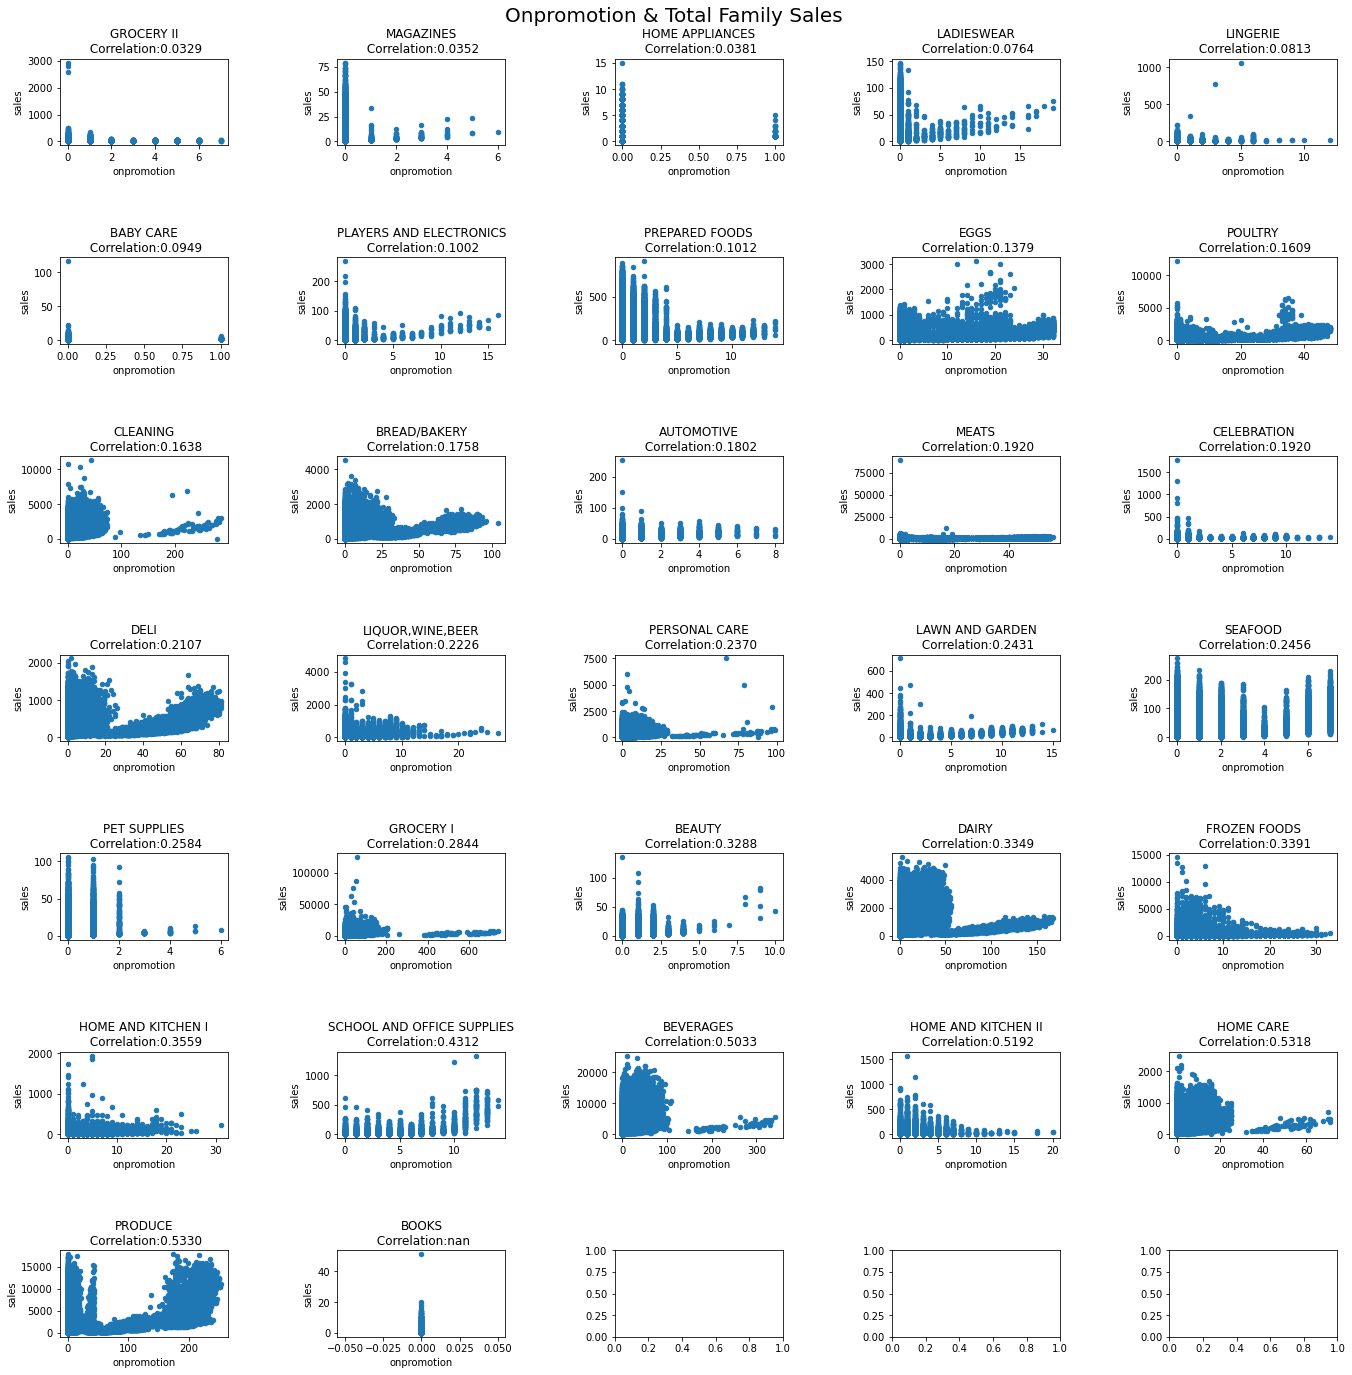

In [7]:
# Plot promotion vs. sales by family
c = df1.groupby("family").corr("spearman").reset_index()
c = c[c.level_1 == "onpromotion"][["family", "sales"]].sort_values("sales")

fig, axes = plt.subplots(7, 5, figsize = (20,20))
for i, fam in enumerate(c.family):
    if i < 6:
        df1[df1.family == fam].plot.scatter(x = "onpromotion", y = "sales", ax=axes[0, i-1])
        axes[0, i-1].set_title(fam+"\n Correlation:"+str(c[c.family == fam].sales.iloc[0])[:6], fontsize = 12)
    if i >= 6 and i<11:
        df1[df1.family == fam].plot.scatter(x = "onpromotion", y = "sales", ax=axes[1, i-6])
        axes[1, i-6].set_title(fam+"\n Correlation:"+str(c[c.family == fam].sales.iloc[0])[:6], fontsize = 12)
    if i >= 11 and i<16:
        df1[df1.family == fam].plot.scatter(x = "onpromotion", y = "sales", ax=axes[2, i-11])
        axes[2, i-11].set_title(fam+"\n Correlation:"+str(c[c.family == fam].sales.iloc[0])[:6], fontsize = 12)
    if i >= 16 and i<21:
        df1[df1.family == fam].plot.scatter(x = "onpromotion", y = "sales", ax=axes[3, i-16])
        axes[3, i-16].set_title(fam+"\n Correlation:"+str(c[c.family == fam].sales.iloc[0])[:6], fontsize = 12)
    if i >= 21 and i<26:
        df1[df1.family == fam].plot.scatter(x = "onpromotion", y = "sales", ax=axes[4, i-21])
        axes[4, i-21].set_title(fam+"\n Correlation:"+str(c[c.family == fam].sales.iloc[0])[:6], fontsize = 12)
    if i >= 26 and i < 31:
        df1[df1.family == fam].plot.scatter(x = "onpromotion", y = "sales", ax=axes[5, i-26])
        axes[5, i-26].set_title(fam+"\n Correlation:"+str(c[c.family == fam].sales.iloc[0])[:6], fontsize = 12)
    if i >= 31 :
        df1[df1.family == fam].plot.scatter(x = "onpromotion", y = "sales", ax=axes[6, i-31])
        axes[6, i-31].set_title(fam+"\n Correlation:"+str(c[c.family == fam].sales.iloc[0])[:6], fontsize = 12)
        
plt.tight_layout(pad=5)
plt.suptitle("Onpromotion & Total Family Sales \n", fontsize = 20);
plt.show()

In [8]:
# Get No. of store_nbr
df.store_nbr.nunique()

54

In [9]:
df2 = df[["date","store_nbr","sales","onpromotion"]]
         
df2.head()
c.dtypes

family     object
sales     float64
dtype: object

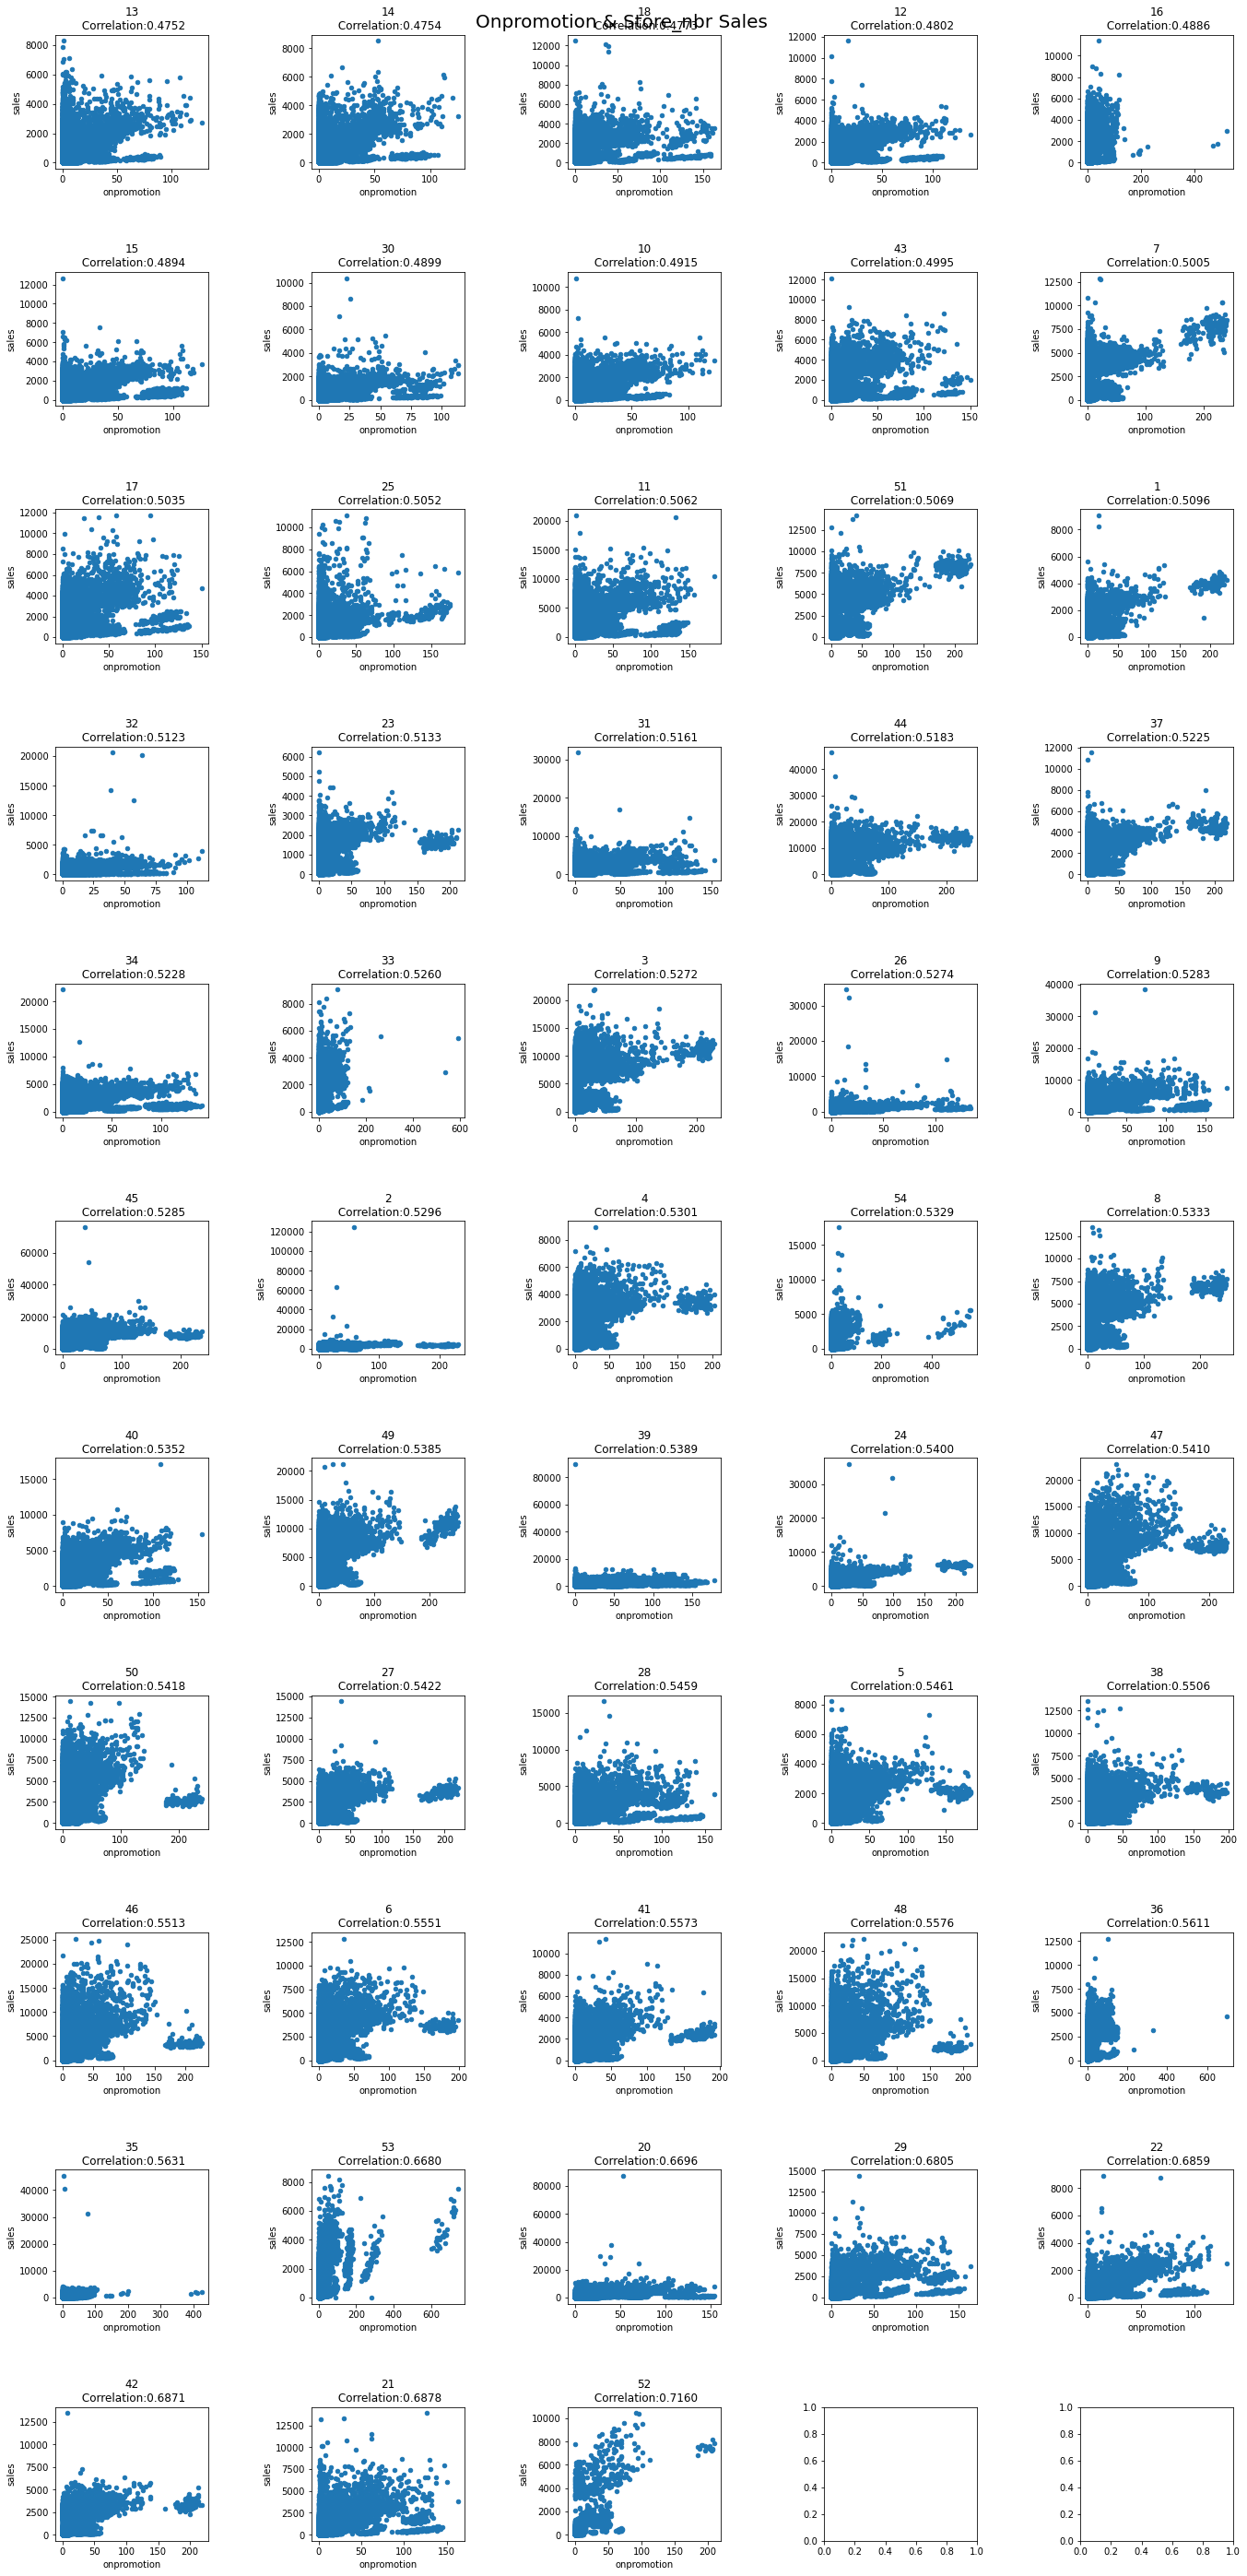

In [10]:
# Plot promotion vs. sales by store_nbr
c = df2.groupby("store_nbr").corr("spearman").reset_index()
c = c[c.level_1 == "onpromotion"][["store_nbr", "sales"]].sort_values("sales")

fig, axes = plt.subplots(11, 5, figsize = (20,40))
for i, nbr in enumerate(c.store_nbr):
    if i < 6:
        df2[df2.store_nbr == nbr].plot.scatter(x = "onpromotion", y = "sales", ax=axes[0, i-1])
        axes[0, i-1].set_title(str(nbr)+"\n Correlation:"+str(c[c.store_nbr == nbr].sales.iloc[0])[:6], fontsize = 12)
    if i >= 6 and i<11:
        df2[df2.store_nbr == nbr].plot.scatter(x = "onpromotion", y = "sales", ax=axes[1, i-6])
        axes[1, i-6].set_title(str(nbr)+"\n Correlation:"+str(c[c.store_nbr == nbr].sales.iloc[0])[:6], fontsize = 12)
    if i >= 11 and i<16:
        df2[df2.store_nbr == nbr].plot.scatter(x = "onpromotion", y = "sales", ax=axes[2, i-11])
        axes[2, i-11].set_title(str(nbr)+"\n Correlation:"+str(c[c.store_nbr == nbr].sales.iloc[0])[:6], fontsize = 12)
    if i >= 16 and i<21:
        df2[df2.store_nbr == nbr].plot.scatter(x = "onpromotion", y = "sales", ax=axes[3, i-16])
        axes[3, i-16].set_title(str(nbr)+"\n Correlation:"+str(c[c.store_nbr == nbr].sales.iloc[0])[:6], fontsize = 12)
    if i >= 21 and i<26:
        df2[df2.store_nbr == nbr].plot.scatter(x = "onpromotion", y = "sales", ax=axes[4, i-21])
        axes[4, i-21].set_title(str(nbr)+"\n Correlation:"+str(c[c.store_nbr == nbr].sales.iloc[0])[:6], fontsize = 12)
    if i >= 26 and i < 31:
        df2[df2.store_nbr == nbr].plot.scatter(x = "onpromotion", y = "sales", ax=axes[5, i-26])
        axes[5, i-26].set_title(str(nbr)+"\n Correlation:"+str(c[c.store_nbr == nbr].sales.iloc[0])[:6], fontsize = 12)
    if i >= 31 and i < 36:
        df2[df2.store_nbr == nbr].plot.scatter(x = "onpromotion", y = "sales", ax=axes[6, i-31])
        axes[6, i-31].set_title(str(nbr)+"\n Correlation:"+str(c[c.store_nbr == nbr].sales.iloc[0])[:6], fontsize = 12)
    if i >= 36 and i < 41:
        df2[df2.store_nbr == nbr].plot.scatter(x = "onpromotion", y = "sales", ax=axes[7, i-36])
        axes[7, i-36].set_title(str(nbr)+"\n Correlation:"+str(c[c.store_nbr == nbr].sales.iloc[0])[:6], fontsize = 12)
    if i >= 41 and i < 46:
        df2[df2.store_nbr == nbr].plot.scatter(x = "onpromotion", y = "sales", ax=axes[8, i-41])
        axes[8, i-41].set_title(str(nbr)+"\n Correlation:"+str(c[c.store_nbr == nbr].sales.iloc[0])[:6], fontsize = 12)
    if i >= 46 and i < 51:
        df2[df2.store_nbr == nbr].plot.scatter(x = "onpromotion", y = "sales", ax=axes[9, i-46])
        axes[9, i-46].set_title(str(nbr)+"\n Correlation:"+str(c[c.store_nbr == nbr].sales.iloc[0])[:6], fontsize = 12)
    if i >= 51 and i < 56:
        df2[df2.store_nbr == nbr].plot.scatter(x = "onpromotion", y = "sales", ax=axes[10, i-51])
        axes[10, i-51].set_title(str(nbr)+"\n Correlation:"+str(c[c.store_nbr == nbr].sales.iloc[0])[:6], fontsize = 12)
     
plt.tight_layout(pad=5)
plt.suptitle("Onpromotion & Store_nbr Sales \n", fontsize = 20);
plt.show()